### Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('TP_day_hour.csv')

In [5]:
df.head()

,date,volume
0,2019-04-30,1866.142857
1,2019-04-30,1907.482143
2,2019-04-30,1948.821429
3,2019-04-30,1990.160714
4,2019-04-30,2031.500000


In [6]:
df.tail()

,date,volume
1253,2019-06-21,7213.434524
1254,2019-06-21,7208.607143
1255,2019-06-21,7203.779762
1256,2019-06-21,7198.952381
1257,2019-06-21,7194.125000


In [7]:
df1=df.reset_index()['volume']

In [8]:
df1

0       1866.142857
1       1907.482143
2       1948.821429
3       1990.160714
4       2031.500000
           ...     
1253    7213.434524
1254    7208.607143
1255    7203.779762
1256    7198.952381
1257    7194.125000
Name: volume, Length: 1258, dtype: float64

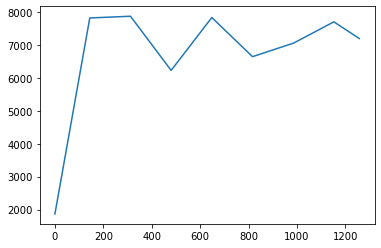

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       1866.142857
1       1907.482143
2       1948.821429
3       1990.160714
4       2031.500000
           ...     
1253    7213.434524
1254    7208.607143
1255    7203.779762
1256    7198.952381
1257    7194.125000
Name: volume, Length: 1258, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.        ]
 [0.00688431]
 [0.01376862]
 ...
 [0.88888658]
 [0.88808266]
 [0.88727875]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 441)

In [18]:
train_data

array([[0.        ],
       [0.00688431],
       [0.01376862],
       [0.02065292],
       [0.02753723],
       [0.03442154],
       [0.04130585],
       [0.04819016],
       [0.05507446],
       [0.06195877],
       [0.06884308],
       [0.07572739],
       [0.0826117 ],
       [0.089496  ],
       [0.09638031],
       [0.10326462],
       [0.11014893],
       [0.11703323],
       [0.12391754],
       [0.13080185],
       [0.13768616],
       [0.14457047],
       [0.15145477],
       [0.15833908],
       [0.16522339],
       [0.1721077 ],
       [0.17899201],
       [0.18587631],
       [0.19276062],
       [0.19964493],
       [0.20652924],
       [0.21341355],
       [0.22029785],
       [0.22718216],
       [0.23406647],
       [0.24095078],
       [0.24783509],
       [0.25471939],
       [0.2616037 ],
       [0.26848801],
       [0.27537232],
       [0.28225663],
       [0.28914093],
       [0.29602524],
       [0.30290955],
       [0.30979386],
       [0.31667817],
       [0.323

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
716/716 [==============================] - 5s 8ms/sample - loss: 0.3027 - val_loss: 0.0104
Epoch 2/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0224 - val_loss: 8.6677e-04
Epoch 3/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0067 - val_loss: 0.0014
Epoch 4/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0036 - val_loss: 0.0014
Epoch 5/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0023 - val_loss: 0.0011
Epoch 6/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0019 - val_loss: 3.5435e-04
Epoch 7/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0016 - val_loss: 2.8851e-04
Epoch 8/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0015 - val_loss: 3.4637e-04
Epoch 9/100
716/716 [==============================] - 3s 4ms/samp

716/716 [==============================] - 3s 4ms/sample - loss: 6.8468e-05 - val_loss: 1.0672e-04
Epoch 73/100
716/716 [==============================] - 3s 5ms/sample - loss: 4.7182e-05 - val_loss: 1.7162e-04
Epoch 74/100
716/716 [==============================] - 3s 5ms/sample - loss: 5.3854e-05 - val_loss: 4.4783e-05
Epoch 75/100
716/716 [==============================] - 3s 5ms/sample - loss: 4.2090e-05 - val_loss: 2.2078e-05
Epoch 76/100
716/716 [==============================] - 3s 4ms/sample - loss: 5.7184e-05 - val_loss: 2.6558e-05
Epoch 77/100
716/716 [==============================] - 3s 5ms/sample - loss: 4.4570e-05 - val_loss: 5.4279e-05
Epoch 78/100
716/716 [==============================] - 3s 4ms/sample - loss: 4.2467e-05 - val_loss: 8.9952e-06
Epoch 79/100
716/716 [==============================] - 3s 4ms/sample - loss: 4.7985e-05 - val_loss: 1.0410e-05
Epoch 80/100
716/716 [==============================] - 3s 4ms/sample - loss: 5.3014e-05 - val_loss: 1.9614e-04
Epoch

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'1.13.1'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7310.811017665107

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

7326.610794818187

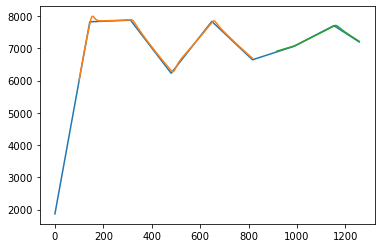

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

441

In [37]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.966866108341655,
 0.9660621956281565,
 0.9652582829146579,
 0.9644543702011594,
 0.963650457487661,
 0.9628465449406942,
 0.962042632227196,
 0.9612387195136975,
 0.9604348068001989,
 0.9596308940867004,
 0.9588269813732018,
 0.9580230686597033,
 0.9572191559462051,
 0.9564152432327064,
 0.9556113305192078,
 0.9548074178057093,
 0.9540035050922109,
 0.9531995923787122,
 0.9523956796652135,
 0.9515917669517155,
 0.9507878542382169,
 0.9499839415247182,
 0.9491800288112198,
 0.9483761160977213,
 0.9475722033842227,
 0.9467682906707244,
 0.9459643781237577,
 0.9451604654102592,
 0.9443565526967608,
 0.9435526399832623,
 0.9427487272697637,
 0.941944814556265,
 0.9411409018427666,
 0.9403369891292683,
 0.9395330764157697,
 0.9387291637022712,
 0.9379252509887726,
 0.9371213382752741,
 0.9363174255617757,
 0.935513512848277,
 0.9347096001347788,
 0.9339056874212801,
 0.9331017747077817,
 0.932297861994283,
 0.9314939492807846,
 0.9306900365672861,
 0.9298861238537877,
 0.9290822113068209

In [40]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8894564]
101
1 day input [0.9660622  0.96525828 0.96445437 0.96365046 0.96284654 0.96204263
 0.96123872 0.96043481 0.95963089 0.95882698 0.95802307 0.95721916
 0.95641524 0.95561133 0.95480742 0.95400351 0.95319959 0.95239568
 0.95159177 0.95078785 0.94998394 0.94918003 0.94837612 0.9475722
 0.94676829 0.94596438 0.94516047 0.94435655 0.94355264 0.94274873
 0.94194481 0.9411409  0.94033699 0.93953308 0.93872916 0.93792525
 0.93712134 0.93631743 0.93551351 0.9347096  0.93390569 0.93310177
 0.93229786 0.93149395 0.93069004 0.92988612 0.92908221 0.9282783
 0.92747439 0.92667047 0.92586656 0.92506265 0.92425874 0.92345482
 0.92265091 0.921847   0.92104308 0.92023917 0.91943526 0.91863135
 0.91782743 0.91702352 0.91621961 0.9154157  0.91461178 0.91380787
 0.91300396 0.91220004 0.91139613 0.91059222 0.90978831 0.90898439
 0.90818048 0.90737657 0.90657266 0.90576874 0.90496483 0.90416092
 0.903357   0.90255309 0.90174918 0.90094527 0.90014135 0.89933744
 0.89853353 0.89772962 0.8969257  0.

8 day output [[0.8851633]]
9 day input [0.95963089 0.95882698 0.95802307 0.95721916 0.95641524 0.95561133
 0.95480742 0.95400351 0.95319959 0.95239568 0.95159177 0.95078785
 0.94998394 0.94918003 0.94837612 0.9475722  0.94676829 0.94596438
 0.94516047 0.94435655 0.94355264 0.94274873 0.94194481 0.9411409
 0.94033699 0.93953308 0.93872916 0.93792525 0.93712134 0.93631743
 0.93551351 0.9347096  0.93390569 0.93310177 0.93229786 0.93149395
 0.93069004 0.92988612 0.92908221 0.9282783  0.92747439 0.92667047
 0.92586656 0.92506265 0.92425874 0.92345482 0.92265091 0.921847
 0.92104308 0.92023917 0.91943526 0.91863135 0.91782743 0.91702352
 0.91621961 0.9154157  0.91461178 0.91380787 0.91300396 0.91220004
 0.91139613 0.91059222 0.90978831 0.90898439 0.90818048 0.90737657
 0.90657266 0.90576874 0.90496483 0.90416092 0.903357   0.90255309
 0.90174918 0.90094527 0.90014135 0.89933744 0.89853353 0.89772962
 0.8969257  0.89612179 0.89531788 0.89451396 0.89371005 0.89290614
 0.89210223 0.89129831 0.8

16 day output [[0.88284636]]
17 day input [0.95319959 0.95239568 0.95159177 0.95078785 0.94998394 0.94918003
 0.94837612 0.9475722  0.94676829 0.94596438 0.94516047 0.94435655
 0.94355264 0.94274873 0.94194481 0.9411409  0.94033699 0.93953308
 0.93872916 0.93792525 0.93712134 0.93631743 0.93551351 0.9347096
 0.93390569 0.93310177 0.93229786 0.93149395 0.93069004 0.92988612
 0.92908221 0.9282783  0.92747439 0.92667047 0.92586656 0.92506265
 0.92425874 0.92345482 0.92265091 0.921847   0.92104308 0.92023917
 0.91943526 0.91863135 0.91782743 0.91702352 0.91621961 0.9154157
 0.91461178 0.91380787 0.91300396 0.91220004 0.91139613 0.91059222
 0.90978831 0.90898439 0.90818048 0.90737657 0.90657266 0.90576874
 0.90496483 0.90416092 0.903357   0.90255309 0.90174918 0.90094527
 0.90014135 0.89933744 0.89853353 0.89772962 0.8969257  0.89612179
 0.89531788 0.89451396 0.89371005 0.89290614 0.89210223 0.89129831
 0.8904944  0.88969049 0.88888658 0.88808266 0.88727875 0.88945639
 0.88870889 0.88802737

24 day output [[0.8813239]]
25 day input [0.94676829 0.94596438 0.94516047 0.94435655 0.94355264 0.94274873
 0.94194481 0.9411409  0.94033699 0.93953308 0.93872916 0.93792525
 0.93712134 0.93631743 0.93551351 0.9347096  0.93390569 0.93310177
 0.93229786 0.93149395 0.93069004 0.92988612 0.92908221 0.9282783
 0.92747439 0.92667047 0.92586656 0.92506265 0.92425874 0.92345482
 0.92265091 0.921847   0.92104308 0.92023917 0.91943526 0.91863135
 0.91782743 0.91702352 0.91621961 0.9154157  0.91461178 0.91380787
 0.91300396 0.91220004 0.91139613 0.91059222 0.90978831 0.90898439
 0.90818048 0.90737657 0.90657266 0.90576874 0.90496483 0.90416092
 0.903357   0.90255309 0.90174918 0.90094527 0.90014135 0.89933744
 0.89853353 0.89772962 0.8969257  0.89612179 0.89531788 0.89451396
 0.89371005 0.89290614 0.89210223 0.89129831 0.8904944  0.88969049
 0.88888658 0.88808266 0.88727875 0.88945639 0.88870889 0.88802737
 0.88741535 0.8868686  0.88637894 0.88593715 0.88553441 0.88516331
 0.88481742 0.88449198

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df1)

1258

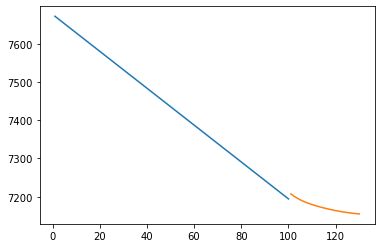

In [44]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

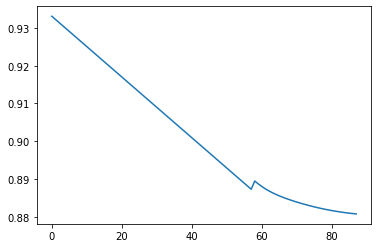

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

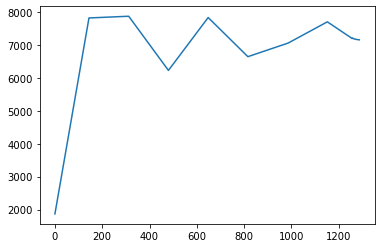

In [47]:
plt.plot(df3)